In [373]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [374]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [375]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [376]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [377]:
df.reset_index(drop=True,inplace=True)

In [378]:
df.drop(all_indices,axis=0,inplace= True)

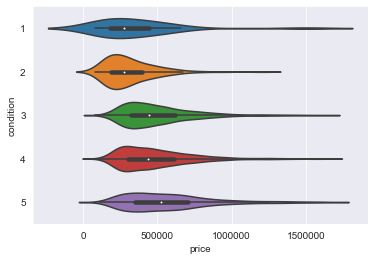

In [379]:
sns.violinplot(x='price', y='condition', data=df, orient='h')
plt.show()

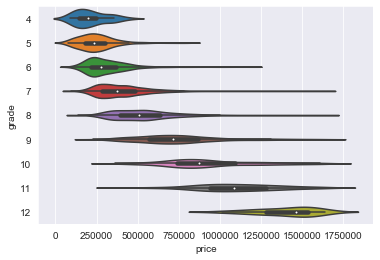

In [380]:
sns.violinplot(x='price', y='grade', data=df, orient='h')
plt.show()

In [381]:
features =  ['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

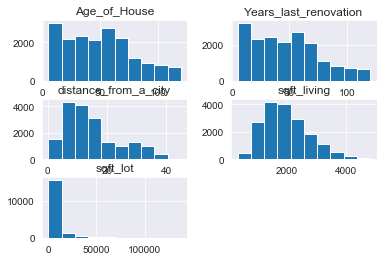

In [382]:
df[features].hist();

In [383]:
tobox =['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

In [384]:
for feat in tobox:
    df[feat],l = scs.boxcox(df[feat])


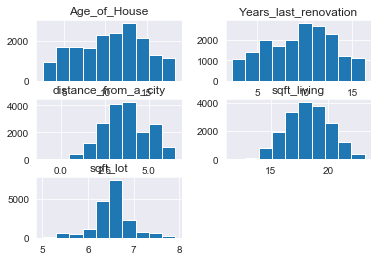

In [385]:
df[features].hist();

In [386]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [387]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [388]:
df['livinglot'] = df['sqft_living']*df['sqft_lot']

In [389]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation','bedbath','livinglot']


In [390]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [391]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [392]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport', 'bedbath',
       'livinglot'],
      dtype='object')

In [393]:
df['grade4'] = df.grade.apply(lambda x: 1 if x ==4 else 0)
df['grade5'] = df.grade.apply(lambda x: 1 if x ==5 else 0)
df['grade6'] = df.grade.apply(lambda x: 1 if x ==6 else 0)
df['grade7'] = df.grade.apply(lambda x: 1 if x ==7 else 0)
df['grade8'] = df.grade.apply(lambda x: 1 if x ==8 else 0)
df['grade9'] = df.grade.apply(lambda x: 1 if x ==9 else 0)
df['grade10'] = df.grade.apply(lambda x: 1 if x ==10 else 0)
df['grade11'] = df.grade.apply(lambda x: 1 if x ==11 else 0)


In [394]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [395]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','basement',
           'grade4', 'grade5', 'grade6', 'grade7', 'grade8', 'grade9',
       'grade10', 'grade11']
outcome = ['price']

In [396]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'basement', 'cond3',
#        'cond4', 'cond5']
# outcome = ['price']

In [397]:
X = df[x_cols]
y = df['price']

In [398]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          2.009e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:36:59   Log-Likelihood:                     -2.4149e+05
No. Observations:               18208   AIC:                                  4.830e+05
Df Residuals:                   18194   BIC:                                  4.831e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.647e+04   1379.382    -11.937      0.000   -1.92e+04   -1.38e+04
bathrooms             1.184e+04   1678.942      7.052      0.000    8548.464    1.51e+04
sqft_living           1.043e+05   2207.108     47.238      0.000    9.99e+04    1.09e+05
sqft_lot              2.991e+04   1256.383     23.805      0.000    2.74e+04    3.24e+04
distance_from_a_city -1.314e+05   1166.156   -112.636      0.000   -1.34e+05   -1.29e+05
basement             -6560.9845   2334.588     -2.810      0.005   -1.11e+04   -1984.972
grade4                4.883e+05   2.82e+04     17.343      0.000    4.33e+05    5.44e+05
grade5                4.559e+05   1.03e+04     44.215      0.000    4.36e+05    4.76e+05
grade6                 4.34e+05   4061.966    106.844      0.000    4.26e+05    4.42e+05
grade7                4.575e+05   2087.841    219.113      0.000    4.53e+05    4.62e+05
grade8                5.078e+05   2174.276    233.561      0.000    5.04e+05    5.12e+05
grade9                6.229e+05   3410.623    182.632      0.000    6.16e+05     6.3e+05
grade10               7.237e+05   5497.265    131.653      0.000    7.13e+05    7.35e+05
grade11               8.448e+05   1.05e+04     80.368      0.000    8.24e+05    8.65e+05
==============================================================================
Omnibus:                     6116.588   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44032.424
Skew:                           1.427   Prob(JB):                         0.00
Kurtosis:                      10.064   Cond. No.                         42.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [399]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

14 14
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.647e+04,1379.382,-11.937,0.0,-1.92e+04,-1.38e+04
bathrooms,1.184e+04,1678.942,7.052,0.0,8548.464,1.51e+04
sqft_living,1.043e+05,2207.108,47.238,0.0,9.99e+04,1.09e+05
sqft_lot,2.991e+04,1256.383,23.805,0.0,2.74e+04,3.24e+04
distance_from_a_city,-1.314e+05,1166.156,-112.636,0.0,-1.34e+05,-1.29e+05


In [400]:
X = df[x_cols]
y= df['price']

In [401]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          2.009e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:37:00   Log-Likelihood:                     -2.4149e+05
No. Observations:               18208   AIC:                                  4.830e+05
Df Residuals:                   18194   BIC:                                  4.831e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.647e+04   1379.382    -11.937      0.000   -1.92e+04   -1.38e+04
bathrooms             1.184e+04   1678.942      7.052      0.000    8548.464    1.51e+04
sqft_living           1.043e+05   2207.108     47.238      0.000    9.99e+04    1.09e+05
sqft_lot              2.991e+04   1256.383     23.805      0.000    2.74e+04    3.24e+04
distance_from_a_city -1.314e+05   1166.156   -112.636      0.000   -1.34e+05   -1.29e+05
basement             -6560.9845   2334.588     -2.810      0.005   -1.11e+04   -1984.972
grade4                4.883e+05   2.82e+04     17.343      0.000    4.33e+05    5.44e+05
grade5                4.559e+05   1.03e+04     44.215      0.000    4.36e+05    4.76e+05
grade6                 4.34e+05   4061.966    106.844      0.000    4.26e+05    4.42e+05
grade7                4.575e+05   2087.841    219.113      0.000    4.53e+05    4.62e+05
grade8                5.078e+05   2174.276    233.561      0.000    5.04e+05    5.12e+05
grade9                6.229e+05   3410.623    182.632      0.000    6.16e+05     6.3e+05
grade10               7.237e+05   5497.265    131.653      0.000    7.13e+05    7.35e+05
grade11               8.448e+05   1.05e+04     80.368      0.000    8.24e+05    8.65e+05
==============================================================================
Omnibus:                     6116.588   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44032.424
Skew:                           1.427   Prob(JB):                         0.00
Kurtosis:                      10.064   Cond. No.                         42.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [402]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7865263245995295),
 ('bathrooms', 2.646740877457657),
 ('sqft_living', 4.573905775316456),
 ('sqft_lot', 1.4821220270196436),
 ('distance_from_a_city', 1.2768901020313719),
 ('basement', 1.9557197695855741),
 ('grade4', 1.022157132176361),
 ('grade5', 1.090878833381293),
 ('grade6', 1.4967184935577256),
 ('grade7', 1.746923022868344),
 ('grade8', 1.2828684533570263),
 ('grade9', 1.2993549473982267),
 ('grade10', 1.2670264834087355),
 ('grade11', 1.105464924568045)]

In [403]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

14 14


In [404]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          2.009e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:37:01   Log-Likelihood:                     -2.4149e+05
No. Observations:               18208   AIC:                                  4.830e+05
Df Residuals:                   18194   BIC:                                  4.831e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.647e+04   1379.382    -11.937      0.000   -1.92e+04   -1.38e+04
bathrooms             1.184e+04   1678.942      7.052      0.000    8548.464    1.51e+04
sqft_living           1.043e+05   2207.108     47.238      0.000    9.99e+04    1.09e+05
sqft_lot              2.991e+04   1256.383     23.805      0.000    2.74e+04    3.24e+04
distance_from_a_city -1.314e+05   1166.156   -112.636      0.000   -1.34e+05   -1.29e+05
basement             -6560.9845   2334.588     -2.810      0.005   -1.11e+04   -1984.972
grade4                4.883e+05   2.82e+04     17.343      0.000    4.33e+05    5.44e+05
grade5                4.559e+05   1.03e+04     44.215      0.000    4.36e+05    4.76e+05
grade6                 4.34e+05   4061.966    106.844      0.000    4.26e+05    4.42e+05
grade7                4.575e+05   2087.841    219.113      0.000    4.53e+05    4.62e+05
grade8                5.078e+05   2174.276    233.561      0.000    5.04e+05    5.12e+05
grade9                6.229e+05   3410.623    182.632      0.000    6.16e+05     6.3e+05
grade10               7.237e+05   5497.265    131.653      0.000    7.13e+05    7.35e+05
grade11               8.448e+05   1.05e+04     80.368      0.000    8.24e+05    8.65e+05
==============================================================================
Omnibus:                     6116.588   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44032.424
Skew:                           1.427   Prob(JB):                         0.00
Kurtosis:                      10.064   Cond. No.                         42.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

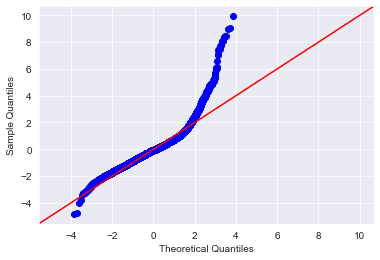

In [405]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


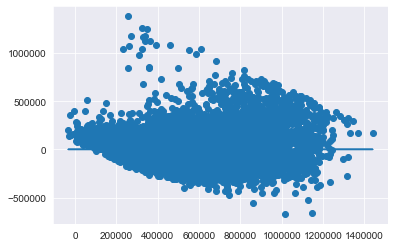

In [406]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

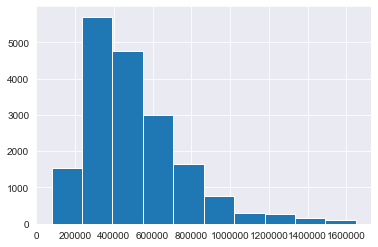

In [407]:
df.price.hist()

In [408]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 675960.0
0.81 percentile: 690000.0
0.82 percentile: 700000.0
0.83 percentile: 716000.0
0.84 percentile: 730000.0
0.85 percentile: 746474.9999999995
0.86 percentile: 760000.0
0.87 percentile: 775000.0
0.88 percentile: 795000.0
0.89 percentile: 810229.9999999997
0.9 percentile: 834000.0
0.91 percentile: 855000.0
0.92 percentile: 880000.0
0.93 percentile: 911559.0000000019
0.94 percentile: 950000.0
0.95 percentile: 991629.9999999995
0.96 percentile: 1060000.0
0.97 percentile: 1160000.0
0.98 percentile: 1260000.0
0.99 percentile: 1400000.0


In [409]:
orig_tot = len(df)
df = df[df.price < 1000000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.04822056239015817


In [410]:
X = df[x_cols]
y = df['price']

In [411]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     3136.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:37:03   Log-Likelihood:            -2.2509e+05
No. Observations:               17330   AIC:                         4.502e+05
Df Residuals:                   17316   BIC:                         4.503e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              -1.28e+04   1084.540    -11.801      0.000   -1.49e+04   -1.07e+04
bathrooms             3987.8834   1321.127      3.019      0.003    1398.341    6577.426
sqft_living           8.781e+04   1731.842     50.702      0.000    8.44e+04    9.12e+04
sqft_lot              2.395e+04    979.790     24.443      0.000     2.2e+04    2.59e+04
distance_from_a_city -1.109e+05    925.146   -119.853      0.000   -1.13e+05   -1.09e+05
basement             -1.402e+04   1826.444     -7.675      0.000   -1.76e+04   -1.04e+04
grade4                4.383e+05   2.14e+04     20.461      0.000    3.96e+05     4.8e+05
grade5                4.178e+05   7860.538     53.147      0.000    4.02e+05    4.33e+05
grade6                4.079e+05   3124.532    130.563      0.000    4.02e+05    4.14e+05
grade7                4.487e+05   1611.257    278.448      0.000    4.45e+05    4.52e+05
grade8                5.042e+05   1682.202    299.733      0.000    5.01e+05    5.08e+05
grade9                5.897e+05   2736.004    215.538      0.000    5.84e+05    5.95e+05
grade10               6.475e+05   4828.254    134.101      0.000    6.38e+05    6.57e+05
grade11               7.042e+05   1.29e+04     54.429      0.000    6.79e+05     7.3e+05
==============================================================================
Omnibus:                      611.091   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              918.389
Skew:                           0.345   Prob(JB):                    3.75e-200
Kurtosis:                       3.893   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [412]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

14 14
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.28e+04,1084.540,-11.801,0.000,-1.49e+04,-1.07e+04
bathrooms,3987.8834,1321.127,3.019,0.003,1398.341,6577.426
sqft_living,8.781e+04,1731.842,50.702,0.000,8.44e+04,9.12e+04
sqft_lot,2.395e+04,979.790,24.443,0.000,2.2e+04,2.59e+04
distance_from_a_city,-1.109e+05,925.146,-119.853,0.000,-1.13e+05,-1.09e+05


In [413]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     3136.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:37:05   Log-Likelihood:            -2.2509e+05
No. Observations:               17330   AIC:                         4.502e+05
Df Residuals:                   17316   BIC:                         4.503e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              -1.28e+04   1084.540    -11.801      0.000   -1.49e+04   -1.07e+04
bathrooms             3987.8834   1321.127      3.019      0.003    1398.341    6577.426
sqft_living           8.781e+04   1731.842     50.702      0.000    8.44e+04    9.12e+04
sqft_lot              2.395e+04    979.790     24.443      0.000     2.2e+04    2.59e+04
distance_from_a_city -1.109e+05    925.146   -119.853      0.000   -1.13e+05   -1.09e+05
basement             -1.402e+04   1826.444     -7.675      0.000   -1.76e+04   -1.04e+04
grade4                4.383e+05   2.14e+04     20.461      0.000    3.96e+05     4.8e+05
grade5                4.178e+05   7860.538     53.147      0.000    4.02e+05    4.33e+05
grade6                4.079e+05   3124.532    130.563      0.000    4.02e+05    4.14e+05
grade7                4.487e+05   1611.257    278.448      0.000    4.45e+05    4.52e+05
grade8                5.042e+05   1682.202    299.733      0.000    5.01e+05    5.08e+05
grade9                5.897e+05   2736.004    215.538      0.000    5.84e+05    5.95e+05
grade10               6.475e+05   4828.254    134.101      0.000    6.38e+05    6.57e+05
grade11               7.042e+05   1.29e+04     54.429      0.000    6.79e+05     7.3e+05
==============================================================================
Omnibus:                      611.091   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              918.389
Skew:                           0.345   Prob(JB):                    3.75e-200
Kurtosis:                       3.893   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [414]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7842070422211134),
 ('bathrooms', 2.529422467208554),
 ('sqft_living', 4.260996189240769),
 ('sqft_lot', 1.4864026846222405),
 ('distance_from_a_city', 1.2842325302806543),
 ('basement', 1.2043845416605419),
 ('grade4', 1.0234640825974337),
 ('grade5', 1.0967616155955753),
 ('grade6', 1.5282756692068185),
 ('grade7', 1.793980373076466),
 ('grade8', 1.2888185428473482),
 ('grade9', 1.243944088571751),
 ('grade10', 1.1769316004793882),
 ('grade11', 1.0302332883201808)]

In [415]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

14 14


In [416]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     3136.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:37:07   Log-Likelihood:            -2.2509e+05
No. Observations:               17330   AIC:                         4.502e+05
Df Residuals:                   17316   BIC:                         4.503e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              -1.28e+04   1084.540    -11.801      0.000   -1.49e+04   -1.07e+04
bathrooms             3987.8834   1321.127      3.019      0.003    1398.341    6577.426
sqft_living           8.781e+04   1731.842     50.702      0.000    8.44e+04    9.12e+04
sqft_lot              2.395e+04    979.790     24.443      0.000     2.2e+04    2.59e+04
distance_from_a_city -1.109e+05    925.146   -119.853      0.000   -1.13e+05   -1.09e+05
basement             -1.402e+04   1826.444     -7.675      0.000   -1.76e+04   -1.04e+04
grade4                4.383e+05   2.14e+04     20.461      0.000    3.96e+05     4.8e+05
grade5                4.178e+05   7860.538     53.147      0.000    4.02e+05    4.33e+05
grade6                4.079e+05   3124.532    130.563      0.000    4.02e+05    4.14e+05
grade7                4.487e+05   1611.257    278.448      0.000    4.45e+05    4.52e+05
grade8                5.042e+05   1682.202    299.733      0.000    5.01e+05    5.08e+05
grade9                5.897e+05   2736.004    215.538      0.000    5.84e+05    5.95e+05
grade10               6.475e+05   4828.254    134.101      0.000    6.38e+05    6.57e+05
grade11               7.042e+05   1.29e+04     54.429      0.000    6.79e+05     7.3e+05
==============================================================================
Omnibus:                      611.091   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              918.389
Skew:                           0.345   Prob(JB):                    3.75e-200
Kurtosis:                       3.893   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

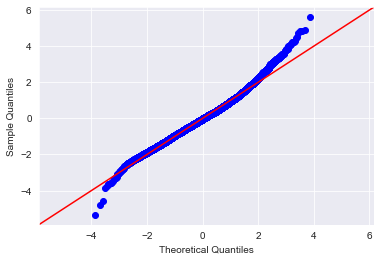

In [417]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


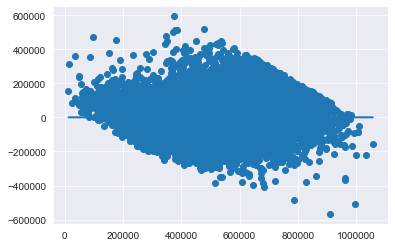

In [418]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [419]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [420]:
residuals = model.resid

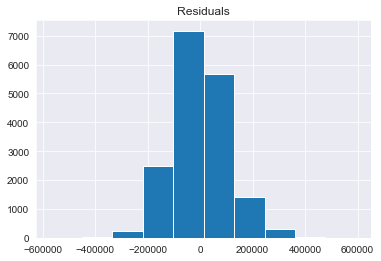

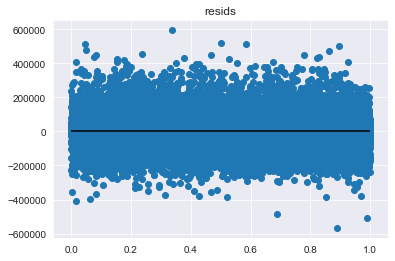

In [421]:
plot_residuals(residuals)

In [422]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [423]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [447]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.6990961772188022, 0.6979431349907868, 0.6986023951349637)

In [425]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-81986.19748940358, -81989.2475238874, -81873.80551436255)

In [426]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.7011342765232934

In [427]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [430]:
make_ols_sklearn(X, y)

train R2 score = 0.7026896764407785
test R2 score = 0.6979639101508576
cv5 R2 score = 0.6990961772188022
cv10 R2 score = 0.6979431349907868
cv5 MSE score = -11273986743.226625
cv10  MSE score = -11276658473.924994


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [444]:
make_ols_sklearn(X, y)

train R2 score = 0.7005147772780524
test R2 score = 0.7063593873362932
cv5 R2 score = 0.6990961772188022
cv10 R2 score = 0.6979431349907868
cv5 MSE score = -11273986743.226625
cv10  MSE score = -11276658473.924994


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [432]:
residuals = model.resid

In [433]:
resid = pd.DataFrame(df['price'])

In [434]:
resid['residuals']  = residuals

In [435]:
resid

,price,residuals
0,538000.0,21090.866863
1,180000.0,-53958.955684
2,604000.0,142731.391700
3,510000.0,4645.247952
5,257500.0,5993.331470
...,...,...
19216,475000.0,2208.046797
19217,360000.0,-86736.753788
19218,400000.0,-164188.051185
19219,402101.0,-81404.592049


In [436]:
import seaborn as sns

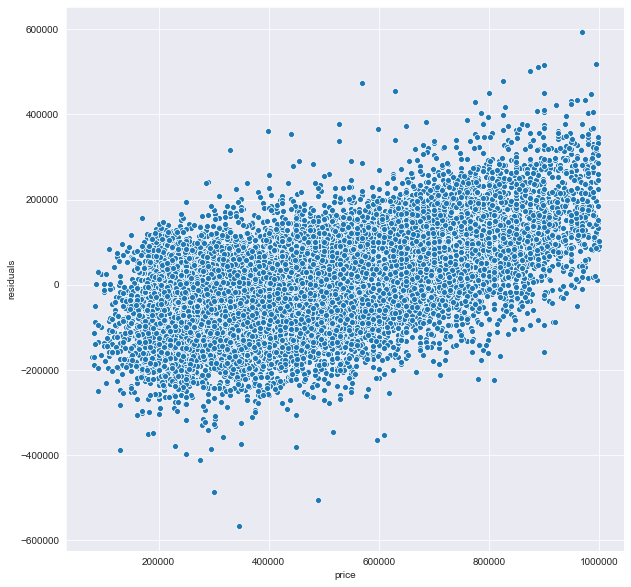

In [437]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)

In [438]:
X_shuff, y_shuff = shuffle(X, y)

In [439]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.7011038723437679

In [440]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.701099457879788

In [441]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.701292050682768

In [442]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     3136.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:39:51   Log-Likelihood:            -2.2509e+05
No. Observations:               17330   AIC:                         4.502e+05
Df Residuals:                   17316   BIC:                         4.503e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              -1.28e+04 